In [9]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
from sklearn.preprocessing import StandardScaler
scaled_df=StandardScaler().fit_transform(df.iloc[:,1:])

In [10]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
print(wcss)

[200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695, 43.92746404497574, 40.52183461131975, 34.687388397849084, 32.70648136388185, 28.311639397122555]


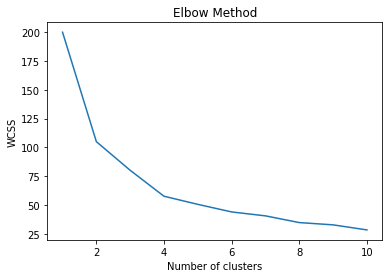

In [11]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
from sklearn.cluster import KMeans
model=KMeans(4,random_state=42)
model.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [13]:
model.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [16]:
df['pred_labels']=model.labels_
df.()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,pred_labels
45,Virginia,8.5,156,63,20.7,0
46,Washington,4.0,145,73,26.2,0
47,West Virginia,5.7,81,39,9.3,3
48,Wisconsin,2.6,53,66,10.8,3
49,Wyoming,6.8,161,60,15.6,0


In [15]:
df.groupby('pred_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
pred_labels,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [17]:
group=df.groupby('pred_labels')
for pred_labels in group:
    print(pred_labels)

(0,        Unnamed: 0  Murder  Assault  UrbanPop  Rape  pred_labels
6     Connecticut     3.3      110        77  11.1            0
7        Delaware     5.9      238        72  15.8            0
10         Hawaii     5.3       46        83  20.2            0
13        Indiana     7.2      113        65  21.0            0
15         Kansas     6.0      115        66  18.0            0
20  Massachusetts     4.4      149        85  16.3            0
29     New Jersey     7.4      159        89  18.8            0
34           Ohio     7.3      120        75  21.4            0
35       Oklahoma     6.6      151        68  20.0            0
36         Oregon     4.9      159        67  29.3            0
37   Pennsylvania     6.3      106        72  14.9            0
38   Rhode Island     3.4      174        87   8.3            0
43           Utah     3.2      120        80  22.9            0
45       Virginia     8.5      156        63  20.7            0
46     Washington     4.0      145  

# Hierarchical Clustering

In [20]:
from sklearn.preprocessing import MinMaxScaler
norm_df=MinMaxScaler().fit_transform(df.iloc[:,1:])
norm_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313, 0.33333333],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 0.66666667],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 , 0.66666667],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548, 0.33333333],
       [0.4939759 , 0.79109589, 1.        , 0.86046512, 0.66666667],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951, 0.66666667],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121, 0.        ],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824, 0.        ],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891, 0.66666667],
       [1.        , 0.56849315, 0.47457627, 0.47803618, 0.33333333],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333, 0.        ],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457, 1.        ],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455, 0.66666667],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517, 0.        ],
       [0.08433735, 0.03767123, 0.

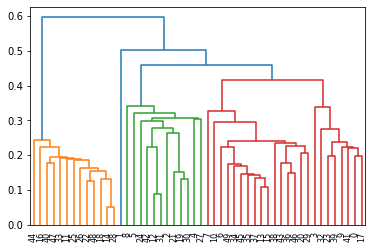

In [21]:
import scipy.cluster.hierarchy as sch
dendogram= sch.dendrogram(sch.linkage(norm_df, method='single'))

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,linkage='single')
hc.fit(norm_df)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [23]:
hc.labels_

array([0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 1, 0, 3, 0, 3, 0, 3, 1, 0, 1,
       3, 0, 1, 3, 3, 1, 3, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0,
       3, 0, 0, 3, 3, 0], dtype=int64)

In [24]:
df['pred_labels']=hc.labels_
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,pred_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [25]:
df.groupby('pred_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
pred_labels,,,,
0,8.416667,173.791667,67.166667,19.658333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,3.600000,78.538462,52.076923,12.176923


# DBSCAN

In [34]:
from sklearn.preprocessing import StandardScaler
scaled_df=StandardScaler().fit_transform(df.iloc[:,1:])

In [35]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(scaled_df)

DBSCAN(eps=2)

In [36]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0],
      dtype=int64)

In [37]:
df['pred_label']=dbscan.labels_

In [38]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,pred_labels,pred_label
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,2,-1
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,0


In [39]:
df.groupby('pred_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,pred_labels
,mean,mean,mean,mean,mean
pred_label,,,,,
-1,10.000000,263.000000,48.000000,44.500000,2.000000
0,9.238889,201.500000,70.888889,23.855556,0.333333
1,3.600000,78.538462,52.076923,12.176923,3.000000
